In [1]:
from matplotlib.colors import Normalize
from scipy.sparse import csr_matrix
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from optimization import GDClassifier, SGDClassifier
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
data_train = pd.read_csv('toxic_train.csv')
data_test = pd.read_csv('toxic_test.csv')

In [3]:
data_train.head(5)
print(data_train.shape)
print(data_test.shape)

(52061, 3)
(20676, 3)


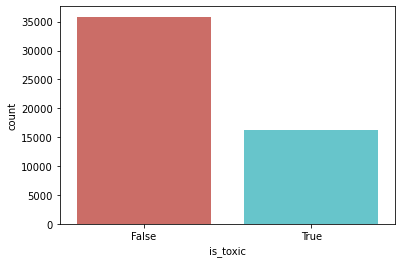

In [4]:
sns.countplot(x='is_toxic', data=data_train, palette='hls')
plt.savefig('gr.jpg')
plt.show()

In [5]:
np.sum(data_train.isna())

Unnamed: 0      0
comment_text    0
is_toxic        0
dtype: int64

Обработка текста

In [3]:
pattern = r"[^0-9a-z']+"
def split(text):
    text = text.lower()
    return re.sub(pattern,' ', text)

In [4]:
data_train['comment_text'] = data_train.comment_text.apply(split)
data_test['comment_text'] = data_test.comment_text.apply(split)

Мешок слов с праметром min_df = 0.001

In [5]:
f = CountVectorizer(min_df=0.001)
X_train = csr_matrix(f.fit_transform(data_train.comment_text))
X_test = csr_matrix(f.transform(data_test.comment_text))
y_train = data_train.is_toxic.astype(int)
y_test = data_test.is_toxic.astype(int)
y_test[y_test == 0] = -1
y_train[y_train == 0] = -1

In [9]:
print(X_train.shape)
print(X_test.shape)

(52061, 3736)
(20676, 3736)


Исследуем <b> Градиентный спуск </b> в зависимости от параметров

In [10]:
gdc = GDClassifier(l2_coef=0.001)
gdc.fit(X_train, y_train, trace=True)
ac = gdc.predict(X_test)

In [11]:
accuracy = metrics.accuracy_score(ac, y_test)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.83


Зависимость от параметра <b>alpha</b>

In [7]:
dict_alpha={}
for alpha in [0.01, 0.1, 1, 10, 100]:
    gdc = GDClassifier(l2_coef=0.001, step_alpha=alpha)
    dict_alpha[alpha] = gdc.fit(X_train, y_train, trace=True)

KeyboardInterrupt: 

Визуализация полученных результатов для alpha

In [ ]:
colors = ['red', 'orange', 'green', 'blue', 'violet']
k = 0
for i in dict_alpha.keys():
    plt.plot(np.arange(len(dict_alpha[i]['acc']), step=15), dict_alpha[i]['acc'][::15],
             color=colors[k], label='alpha='+str(i))
    k += 1

plt.title("Зависимость точности метода от номера итерации")
plt.xlabel("Номер итерации")
plt.ylabel("Точность")
plt.legend()
plt.savefig('alpha_acc_iter.pdf')

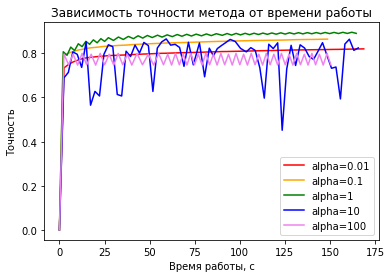

In [14]:
k = 0
for i in dict_alpha.keys():
    plt.plot(np.cumsum(dict_alpha[i]['time'])[::15], dict_alpha[i]['acc'][::15],
             color=colors[k], label='alpha='+str(i))
    k += 1

plt.title("Зависимость точности метода от времени работы")
plt.xlabel("Время работы, c")
plt.ylabel("Точность")
plt.legend()
plt.savefig('alpha_acc_time.pdf')

In [ ]:
k = 0
for i in dict_alpha.keys():
    plt.semilogy(np.arange(len(dict_alpha[i]['func']), step=15), dict_alpha[i]['func'][::15],
             color=colors[k], label='alpha='+str(i))
    k += 1

plt.title("Зависимость функции потерь от номера итерации")
plt.xlabel("Номер итерации")
plt.ylabel("Значение функции ошибок")
plt.legend()
plt.savefig('alpha_loss_iter.pdf')

In [ ]:
k = 0
for i in dict_alpha.keys():
    plt.semilogy(np.cumsum(dict_alpha[i]['time'])[::15], dict_alpha[i]['func'][::15],
             color=colors[k], label='alpha='+str(i))
    k += 1

plt.title("Зависимость функции потерь от времени работы")
plt.xlabel("Время работы, c")
plt.ylabel("Значение функции потерь")
plt.legend()
plt.savefig('alpha_loss_time.pdf')

Зависимость от параметра <b>beta

In [17]:
dict_beta={}
for beta in [0, 0.01, 0.1, 0.5, 1]:
    cur_obj = GDClassifier(l2_coef=0.001, step_beta=beta)
    dict_beta[beta] = cur_obj.fit(X_train, y_train, trace=True)

Визуализация полученных результатов для beta

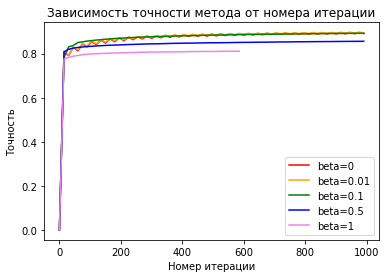

In [18]:
k = 0
for i in dict_beta.keys():
    plt.plot(np.arange(len(dict_beta[i]['acc']), step=15), dict_beta[i]['acc'][::15],
             color=colors[k], label='beta='+str(i))
    k += 1

plt.title("Зависимость точности метода от номера итерации")
plt.xlabel("Номер итерации")
plt.ylabel("Точность")
plt.legend()
plt.savefig('beta_acc_iter.pdf')

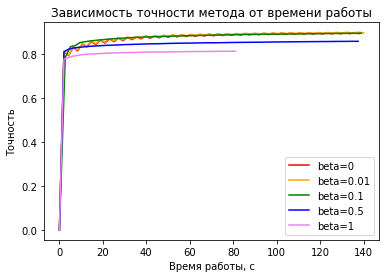

In [19]:
k = 0
for i in dict_beta.keys():
    plt.plot(np.cumsum(dict_beta[i]['time'])[::15], dict_beta[i]['acc'][::15],
             color=colors[k], label='beta='+str(i))
    k += 1

plt.title("Зависимость точности метода от времени работы")
plt.xlabel("Время работы, c")
plt.ylabel("Точность")
plt.legend()
plt.savefig('beta_acc_time.pdf')

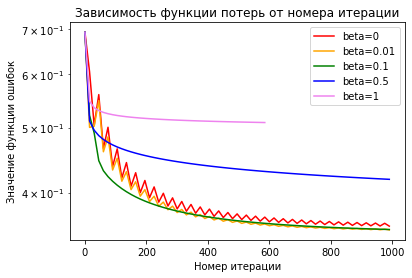

In [20]:
k = 0
for i in dict_beta.keys():
    plt.semilogy(np.arange(len(dict_beta[i]['func']), step=15), dict_beta[i]['func'][::15],
             color=colors[k], label='beta='+str(i))
    k += 1

plt.title("Зависимость функции потерь от номера итерации")
plt.xlabel("Номер итерации")
plt.ylabel("Значение функции ошибок")
plt.legend()
plt.savefig('beta_loss_iter.pdf')

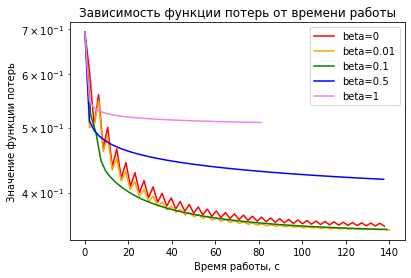

In [21]:
k = 0
for i in dict_beta.keys():
    plt.semilogy(np.cumsum(dict_beta[i]['time'])[::15], dict_beta[i]['func'][::15],
             color=colors[k], label='beta='+str(i))
    k += 1

plt.title("Зависимость функции потерь от времени работы")
plt.xlabel("Время работы, c")
plt.ylabel("Значение функции потерь")
plt.legend()
plt.savefig('beta_loss_time.pdf')

Зависимость от параметра <b>начального приблежения

In [22]:
dict_w={}
shape = X_train.shape[1]

for i, w in enumerate([np.zeros(shape), 0.01 * np.ones(shape),
                       0.1 * np.ones(shape), 0.5 * np.ones(shape)]):
    cur_obj = GDClassifier(l2_coef=0.001)
    dict_w[i] = cur_obj.fit(X_train, y_train, trace=True, w_0=w)

Визуализация полученных результатов для w_0

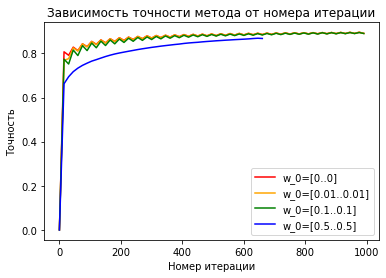

In [23]:
plt.plot(np.arange(len(dict_w[0]['acc']), step=15), dict_w[0]['acc'][::15], color='red', label='w_0=[0..0]')
plt.plot(np.arange(len(dict_w[1]['acc']), step=15), dict_w[1]['acc'][::15], color='orange', label='w_0=[0.01..0.01]')
plt.plot(np.arange(len(dict_w[2]['acc']), step=15), dict_w[2]['acc'][::15], color='green', label='w_0=[0.1..0.1]')
plt.plot(np.arange(len(dict_w[3]['acc']), step=15), dict_w[3]['acc'][::15], color='blue',label='w_0=[0.5..0.5]')

plt.title("Зависимость точности метода от номера итерации")
plt.xlabel("Номер итерации")
plt.ylabel("Точность")
plt.legend()
plt.savefig('w_acc_iter.pdf')

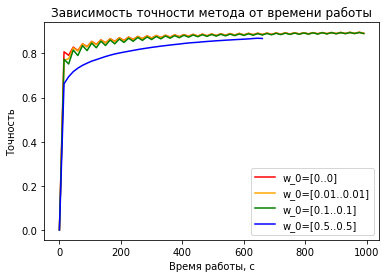

In [24]:
plt.plot(np.arange(len(dict_w[0]['time']), step=15), dict_w[0]['acc'][::15], color='red', label='w_0=[0..0]')
plt.plot(np.arange(len(dict_w[1]['time']), step=15), dict_w[1]['acc'][::15], color='orange', label='w_0=[0.01..0.01]')
plt.plot(np.arange(len(dict_w[2]['time']), step=15), dict_w[2]['acc'][::15], color='green', label='w_0=[0.1..0.1]')
plt.plot(np.arange(len(dict_w[3]['time']), step=15), dict_w[3]['acc'][::15], color='blue',label='w_0=[0.5..0.5]')

plt.title("Зависимость точности метода от времени работы")
plt.xlabel("Время работы, c")
plt.ylabel("Точность")
plt.legend()
plt.savefig('w_acc_time.pdf')

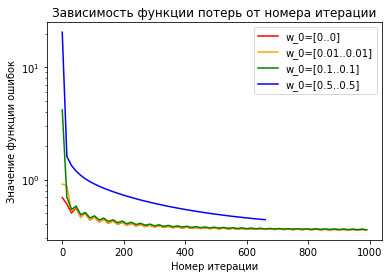

In [25]:
plt.semilogy(np.arange(len(dict_w[0]['func']), step=15), dict_w[0]['func'][::15], color='red', label='w_0=[0..0]')
plt.semilogy(np.arange(len(dict_w[1]['func']), step=15), dict_w[1]['func'][::15], color='orange', label='w_0=[0.01..0.01]')
plt.semilogy(np.arange(len(dict_w[2]['func']), step=15), dict_w[2]['func'][::15], color='green', label='w_0=[0.1..0.1]')
plt.semilogy(np.arange(len(dict_w[3]['func']), step=15), dict_w[3]['func'][::15], color='blue',label='w_0=[0.5..0.5]')

plt.title("Зависимость функции потерь от номера итерации")
plt.xlabel("Номер итерации")
plt.ylabel("Значение функции ошибок")
plt.legend()
plt.savefig('w_loss_iter.pdf')

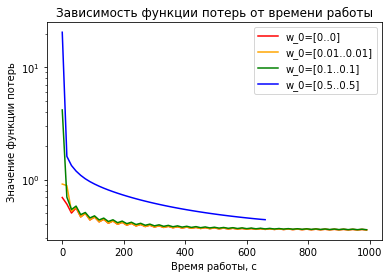

In [26]:
plt.semilogy(np.arange(len(dict_w[0]['time']), step=15), dict_w[0]['func'][::15], color='red', label='w_0=[0..0]')
plt.semilogy(np.arange(len(dict_w[1]['time']), step=15), dict_w[1]['func'][::15], color='orange', label='w_0=[0.01..0.01]')
plt.semilogy(np.arange(len(dict_w[2]['time']), step=15), dict_w[2]['func'][::15], color='green', label='w_0=[0.1..0.1]')
plt.semilogy(np.arange(len(dict_w[3]['time']), step=15), dict_w[3]['func'][::15], color='blue',label='w_0=[0.5..0.5]')

plt.title("Зависимость функции потерь от времени работы")
plt.xlabel("Время работы, c")
plt.ylabel("Значение функции потерь")
plt.legend()
plt.savefig('w_loss_time.pdf')

Исследуем <b> Стохастический градиентный спуск </b> в зависимости от параметров

Зависимость от параметра <b>alpha</b>

In [27]:
dict_alpha={}
for alpha in [0.01, 0.1, 1, 10, 100]:
    gdc = SGDClassifier(l2_coef=0.001, step_alpha=alpha, batch_size=1000)
    dict_alpha[alpha] = gdc.fit(X_train, y_train, trace=True)

Визуализация полученных результатов для alpha

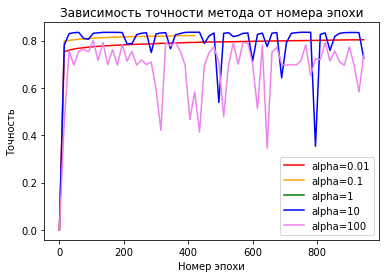

In [28]:
colors = ['red', 'orange', 'green', 'blue', 'violet']
k = 0
for i in dict_alpha.keys():
    plt.plot(np.arange(len(dict_alpha[i]['acc']), step=15), dict_alpha[i]['acc'][::15],
             color=colors[k], label='alpha='+str(i))
    k += 1

plt.title("Зависимость точности метода от номера эпохи")
plt.xlabel("Номер эпохи")
plt.ylabel("Точность")
plt.legend()
plt.savefig('s_alpha_acc_iter.pdf')

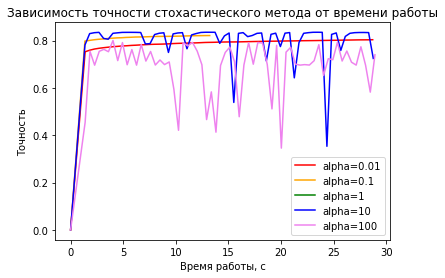

In [29]:
k = 0
for i in dict_alpha.keys():
    plt.plot(np.cumsum(dict_alpha[i]['time'])[::15], dict_alpha[i]['acc'][::15],
             color=colors[k], label='alpha='+str(i))
    k += 1

plt.title("Зависимость точности стохастического метода от времени работы")
plt.xlabel("Время работы, c")
plt.ylabel("Точность")
plt.legend()
plt.savefig('s_alpha_acc_time.pdf')

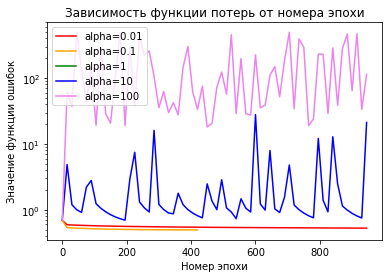

In [30]:
k = 0
for i in dict_alpha.keys():
    plt.semilogy(np.arange(len(dict_alpha[i]['func']), step=15), dict_alpha[i]['func'][::15],
             color=colors[k], label='alpha='+str(i))
    k += 1

plt.title("Зависимость функции потерь от номера эпохи")
plt.xlabel("Номер эпохи")
plt.ylabel("Значение функции ошибок")
plt.legend()
plt.savefig('s_alpha_loss_iter.pdf')

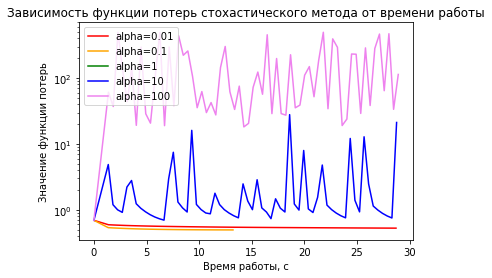

In [31]:
k = 0
for i in dict_alpha.keys():
    plt.semilogy(np.cumsum(dict_alpha[i]['time'])[::15], dict_alpha[i]['func'][::15],
             color=colors[k], label='alpha='+str(i))
    k += 1

plt.title("Зависимость функции потерь стохастического метода от времени работы")
plt.xlabel("Время работы, c")
plt.ylabel("Значение функции потерь")
plt.legend()
plt.savefig('s_alpha_loss_time.pdf')

Зависимость от параметра <b>beta

In [32]:
dict_beta={}
for beta in [0, 0.01, 0.1, 0.5, 1]:
    cur_obj = SGDClassifier(l2_coef=0.001, step_beta=beta, batch_size=1000)
    dict_beta[beta] = cur_obj.fit(X_train, y_train, trace=True)

Визуализация полученных результатов для beta

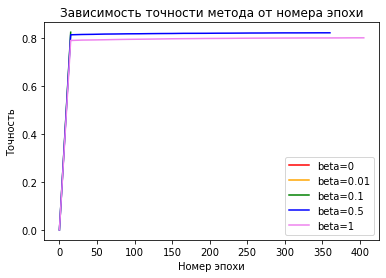

In [33]:
k = 0
for i in dict_beta.keys():
    plt.plot(np.arange(len(dict_beta[i]['acc']), step=15), dict_beta[i]['acc'][::15],
             color=colors[k], label='beta='+str(i))
    k += 1

plt.title("Зависимость точности метода от номера эпохи")
plt.xlabel("Номер эпохи")
plt.ylabel("Точность")
plt.legend()
plt.savefig('s_beta_acc_iter.pdf')

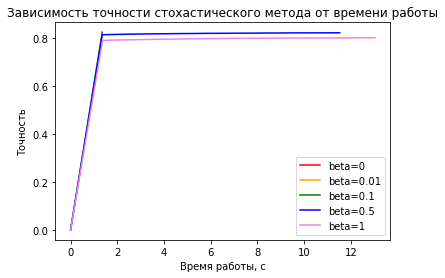

In [34]:
k = 0
for i in dict_beta.keys():
    plt.plot(np.cumsum(dict_beta[i]['time'])[::15], dict_beta[i]['acc'][::15],
             color=colors[k], label='beta='+str(i))
    k += 1

plt.title("Зависимость точности стохастического метода от времени работы")
plt.xlabel("Время работы, c")
plt.ylabel("Точность")
plt.legend()
plt.savefig('s_beta_acc_time.pdf')

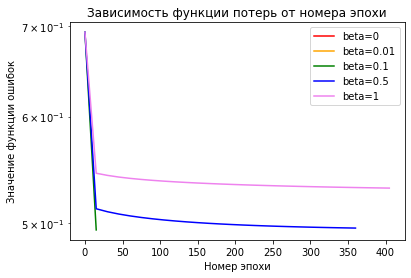

In [35]:
k = 0
for i in dict_beta.keys():
    plt.semilogy(np.arange(len(dict_beta[i]['func']), step=15), dict_beta[i]['func'][::15],
             color=colors[k], label='beta='+str(i))
    k += 1

plt.title("Зависимость функции потерь от номера эпохи")
plt.xlabel("Номер эпохи")
plt.ylabel("Значение функции ошибок")
plt.legend()
plt.savefig('s_beta_loss_iter.pdf')

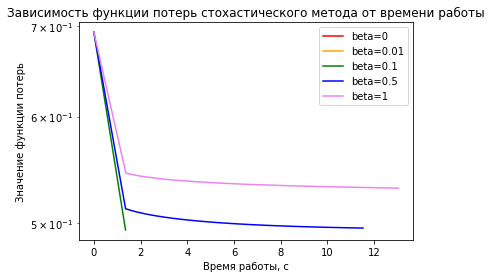

In [36]:
k = 0
for i in dict_beta.keys():
    plt.semilogy(np.cumsum(dict_beta[i]['time'])[::15], dict_beta[i]['func'][::15],
             color=colors[k], label='beta='+str(i))
    k += 1

plt.title("Зависимость функции потерь стохастического метода от времени работы")
plt.xlabel("Время работы, c")
plt.ylabel("Значение функции потерь")
plt.legend()
plt.savefig('s_beta_loss_time.pdf')

Зависимость от параметра <b>начального приблежения

In [37]:
dict_w={}
shape = X_train.shape[1]

for i, w in enumerate([np.zeros(shape), 0.01 * np.ones(shape),
                       0.1 * np.ones(shape), 0.5 * np.ones(shape)]):
    cur_obj = SGDClassifier(l2_coef=0.001, batch_size=1000)
    dict_w[i] = cur_obj.fit(X_train, y_train, trace=True, w_0=w)

Визуализация полученных результатов для w_0

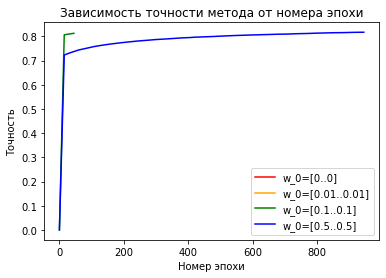

In [38]:
plt.plot(np.arange(len(dict_w[0]['acc']), step=15), dict_w[0]['acc'][::15], color='red', label='w_0=[0..0]')
plt.plot(np.arange(len(dict_w[1]['acc']), step=15), dict_w[1]['acc'][::15], color='orange', label='w_0=[0.01..0.01]')
plt.plot(np.arange(len(dict_w[2]['acc']), step=15), dict_w[2]['acc'][::15], color='green', label='w_0=[0.1..0.1]')
plt.plot(np.arange(len(dict_w[3]['acc']), step=15), dict_w[3]['acc'][::15], color='blue',label='w_0=[0.5..0.5]')

plt.title("Зависимость точности метода от номера эпохи")
plt.xlabel("Номер эпохи")
plt.ylabel("Точность")
plt.legend()
plt.savefig('s_w_acc_iter.pdf')

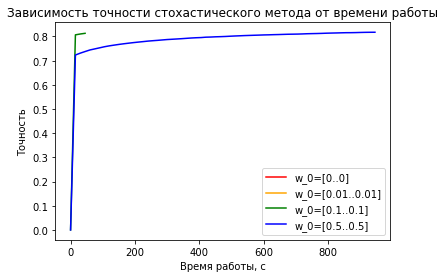

In [39]:
plt.plot(np.arange(len(dict_w[0]['time']), step=15), dict_w[0]['acc'][::15], color='red', label='w_0=[0..0]')
plt.plot(np.arange(len(dict_w[1]['time']), step=15), dict_w[1]['acc'][::15], color='orange', label='w_0=[0.01..0.01]')
plt.plot(np.arange(len(dict_w[2]['time']), step=15), dict_w[2]['acc'][::15], color='green', label='w_0=[0.1..0.1]')
plt.plot(np.arange(len(dict_w[3]['time']), step=15), dict_w[3]['acc'][::15], color='blue',label='w_0=[0.5..0.5]')

plt.title("Зависимость точности стохастического метода от времени работы")
plt.xlabel("Время работы, c")
plt.ylabel("Точность")
plt.legend()
plt.savefig('s_w_acc_time.pdf')

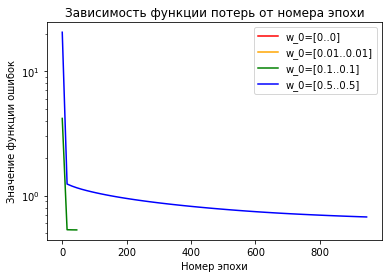

In [40]:
plt.semilogy(np.arange(len(dict_w[0]['func']), step=15), dict_w[0]['func'][::15], color='red', label='w_0=[0..0]')
plt.semilogy(np.arange(len(dict_w[1]['func']), step=15), dict_w[1]['func'][::15], color='orange', label='w_0=[0.01..0.01]')
plt.semilogy(np.arange(len(dict_w[2]['func']), step=15), dict_w[2]['func'][::15], color='green', label='w_0=[0.1..0.1]')
plt.semilogy(np.arange(len(dict_w[3]['func']), step=15), dict_w[3]['func'][::15], color='blue',label='w_0=[0.5..0.5]')

plt.title("Зависимость функции потерь от номера эпохи")
plt.xlabel("Номер эпохи")
plt.ylabel("Значение функции ошибок")
plt.legend()
plt.savefig('s_w_loss_iter.pdf')

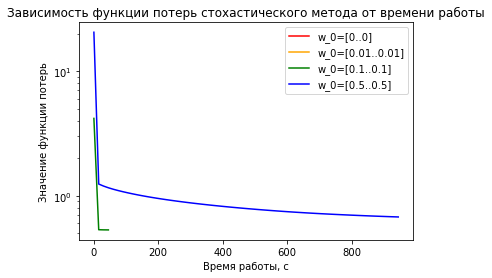

In [41]:
plt.semilogy(np.arange(len(dict_w[0]['time']), step=15), dict_w[0]['func'][::15], color='red', label='w_0=[0..0]')
plt.semilogy(np.arange(len(dict_w[1]['time']), step=15), dict_w[1]['func'][::15], color='orange', label='w_0=[0.01..0.01]')
plt.semilogy(np.arange(len(dict_w[2]['time']), step=15), dict_w[2]['func'][::15], color='green', label='w_0=[0.1..0.1]')
plt.semilogy(np.arange(len(dict_w[3]['time']), step=15), dict_w[3]['func'][::15], color='blue',label='w_0=[0.5..0.5]')

plt.title("Зависимость функции потерь стохастического метода от времени работы")
plt.xlabel("Время работы, c")
plt.ylabel("Значение функции потерь")
plt.legend()
plt.savefig('s_w_loss_time.pdf')


Зависимость от параметра <b>batch_size

In [42]:
sdict_batch={}
for batch in [500, 1000, 2000, 5000, 10000]:
    sgd = SGDClassifier(l2_coef=0.001, batch_size=batch)
    sdict_batch[batch] = sgd.fit(X_train, y_train, trace=True)

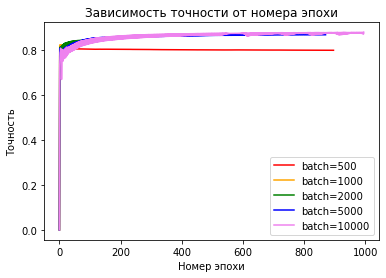

In [43]:
colors = ['red', 'orange', 'green', 'blue', 'violet']
k = 0
for i in sdict_batch.keys():
    plt.plot(np.arange(len(sdict_batch[i]['acc'])), sdict_batch[i]['acc'], color=colors[k], label='batch='+str(i))
    k += 1
plt.title("Зависимость точности от номера эпохи")
plt.xlabel("Номер эпохи")
plt.ylabel("Точность")
plt.legend()
plt.savefig('s_batch_acc_iter.pdf')

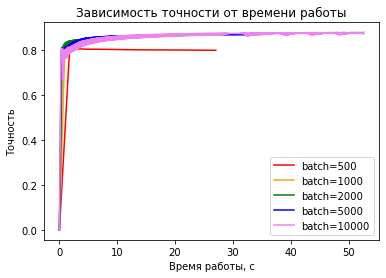

In [44]:
colors = ['red', 'orange', 'green', 'blue', 'violet']
k = 0
for i in sdict_batch.keys():
    plt.plot(np.cumsum(sdict_batch[i]['time']), sdict_batch[i]['acc'], color=colors[k], label='batch='+str(i))
    k += 1
plt.title("Зависимость точности от времени работы")
plt.ylabel("Точность")
plt.xlabel("Время работы, c")
plt.legend()
plt.savefig('s_batch_acc_time.pdf')

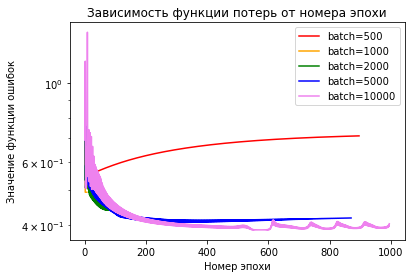

In [45]:
k = 0
for i in sdict_batch.keys():
    plt.semilogy(np.arange(len(sdict_batch[i]['func'])), sdict_batch[i]['func'],
                 color=colors[k], label='batch='+str(i))
    k += 1
plt.title("Зависимость функции потерь от номера эпохи")
plt.xlabel("Номер эпохи")
plt.ylabel("Значение функции ошибок")
plt.legend()
plt.savefig('s_batch_loss_iter.pdf')

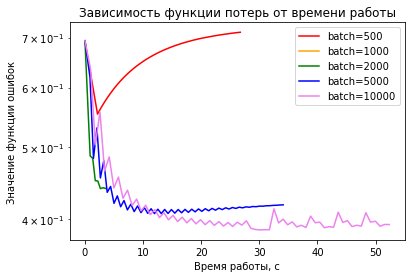

In [46]:
k = 0
for i in sdict_batch.keys():
    plt.semilogy(np.cumsum(sdict_batch[i]['time'])[::15], sdict_batch[i]['func'][::15],
             color=colors[k], label='batch='+str(i))
    k += 1
plt.title("Зависимость функции потерь от времени работы")
plt.ylabel("Значение функции ошибок")
plt.xlabel("Время работы, c")
plt.legend()
plt.savefig('s_batch_loss_time.pdf')

Сравнение методов на лучших гиперпараметрах

In [6]:
gdc = GDClassifier(l2_coef=0.001)
inf_gdc =gdc.fit(X_train, y_train, trace=True)
gdc_predict = gdc.predict(X_test)
acc_gdc = np.sum(gdc_predict == y_test)/y_test.shape[0]

In [7]:
sgdc = SGDClassifier(l2_coef=0.001, batch_size=3500)
inf_sgdc = sgdc.fit(X_train, y_train, trace=True)
sgdc_predict = sgdc.predict(X_test)
acc_sgdc = np.sum(sgdc_predict == y_test)/y_test.shape[0]

In [8]:
print(acc_gdc, np.sum(inf_gdc['time']))
print(acc_sgdc, np.sum(inf_sgdc['time']))

0.832849680789321 166.96201157569885
0.8168891468369124 9.761038780212402


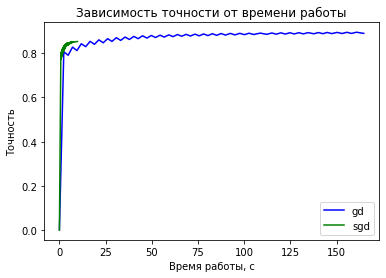

In [9]:
plt.plot(np.cumsum(inf_gdc['time'])[::15], inf_gdc['acc'][::15], color='blue', label='gd')
plt.plot(np.cumsum(inf_sgdc['time']), inf_sgdc['acc'], color='green', label='sgd')
plt.title("Зависимость точности от времени работы")
plt.ylabel("Точность")
plt.xlabel("Время работы, c")
plt.legend()
plt.savefig('comp_acc.pdf')

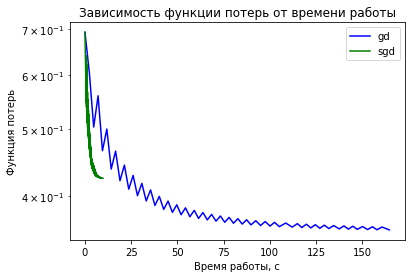

In [10]:
plt.plot(np.cumsum(inf_gdc['time'])[::15], inf_gdc['func'][::15], color='blue', label='gd')
plt.semilogy(np.cumsum(inf_sgdc['time']), inf_sgdc['func'], color='green', label='sgd')
plt.title("Зависимость функции потерь от времени работы")
plt.ylabel("Функция потерь")
plt.xlabel("Время работы, c")
plt.legend()
plt.savefig('comp_loss.pdf')

Лемматизация

In [52]:
f = CountVectorizer(min_df=0.001, stop_words='english')
X_train = csr_matrix(f.fit_transform(data_train.comment_text))
X_test = csr_matrix(f.transform(data_test.comment_text))
y_train = data_train.is_toxic.astype(int)
y_test = data_test.is_toxic.astype(int)
y_test[y_test == 0] = -1
y_train[y_train == 0] = -1

In [53]:
print(X_train.shape)
X_test.shape


(52061, 3467)


(20676, 3467)

In [54]:
gdc = GDClassifier(l2_coef=0.001)
inf_gdc =gdc.fit(X_train, y_train, trace=True)
gdc_predict = gdc.predict(X_test)
acc_gdc = np.sum(gdc_predict == y_test)/y_test.shape[0]

In [55]:
sgdc = SGDClassifier(l2_coef=0.001, batch_size=2000)
inf_sgdc = sgdc.fit(X_train, y_train, trace=True)
sgdc_predict = sgdc.predict(X_test)
acc_sgdc = np.sum(sgdc_predict == y_test)/y_test.shape[0]

In [56]:
print(acc_gdc, np.sum(inf_gdc['time']))
print(acc_sgdc, np.sum(inf_sgdc['time']))

0.8415554265815438 54.32570743560791
0.8231766299090734 3.4637346267700195


TF-IDF min

In [77]:
acc_tf_idf = {}
time_tf_idf = {}
for min in [0.001, 0.01, 0.1, 1, 10, 100]:
    f = TfidfVectorizer(min_df=min, stop_words='english')
    X_train = csr_matrix(f.fit_transform(data_train.comment_text))
    X_test = csr_matrix(f.transform(data_test.comment_text))
    print(X_train.shape)
    print(X_test.shape)
    sgdc = GDClassifier(l2_coef=0.001)
    inf_sgdc = sgdc.fit(X_train, y_train, trace=True)
    sgdc_predict = sgdc.predict(X_test)
    acc_tf_idf[min] = np.sum(sgdc_predict == y_test)/y_test.shape[0]
    time_tf_idf[min] = np.sum(inf_sgdc['time'])

(52061, 3467)
(20676, 3467)
(52061, 380)
(20676, 380)
(52061, 7)
(20676, 7)
(52061, 89055)
(20676, 89055)
(52061, 10935)
(20676, 10935)
(52061, 2082)
(20676, 2082)


In [78]:
acc_tf_idf

{0.001: 0.837734571483846,
 0.01: 0.773553878893403,
 0.1: 0.3696072741342619,
 1: 0.8444089765912168,
 10: 0.8439736893016058,
 100: 0.8321242019733024}

In [79]:
time_tf_idf

{0.001: 60.95464539527893,
 0.01: 28.56657361984253,
 0.1: 1.3194389343261719,
 1: 83.45882892608643,
 10: 68.77705121040344,
 100: 54.20605421066284}

Bag of Words min

In [80]:
acc_tf_idf = {}
time_tf_idf = {}
for min in [0.001, 0.01, 0.1, 1, 10, 100]:
    f = CountVectorizer(min_df=min, stop_words='english')
    X_train = csr_matrix(f.fit_transform(data_train.comment_text))
    X_test = csr_matrix(f.transform(data_test.comment_text))
    print(X_train.shape)
    print(X_test.shape)
    sgdc = GDClassifier(l2_coef=0.001)
    inf_sgdc = sgdc.fit(X_train, y_train, trace=True)
    sgdc_predict = sgdc.predict(X_test)
    acc_tf_idf[min] = np.sum(sgdc_predict == y_test)/y_test.shape[0]
    time_tf_idf[min] = np.sum(inf_sgdc['time'])

(52061, 3467)
(20676, 3467)
(52061, 380)
(20676, 380)
(52061, 7)
(20676, 7)
(52061, 89055)
(20676, 89055)
(52061, 10935)
(20676, 10935)
(52061, 2082)
(20676, 2082)


In [81]:
acc_tf_idf

{0.001: 0.8415554265815438,
 0.01: 0.7649932288643838,
 0.1: 0.3423292706519636,
 1: 0.8548558715418844,
 10: 0.852147417295415,
 100: 0.8322209324821048}

In [82]:
time_tf_idf

{0.001: 52.732966899871826,
 0.01: 15.7160005569458,
 0.1: 0.4438445568084717,
 1: 79.73378705978394,
 10: 64.95235252380371,
 100: 45.82142448425293}

TF-IDF max

In [87]:
acc_tf_idf = {}
time_tf_idf = {}
for max in [0.001, 0.01, 0.1, 1, 10, 100]:
    f = TfidfVectorizer(min_df=1,max_df=max, stop_words='english')
    X_train = csr_matrix(f.fit_transform(data_train.comment_text))
    X_test = csr_matrix(f.transform(data_test.comment_text))
    print(X_train.shape)
    print(X_test.shape)
    sgdc = GDClassifier(l2_coef=0.001)
    inf_sgdc = sgdc.fit(X_train, y_train, trace=True)
    sgdc_predict = sgdc.predict(X_test)
    acc_tf_idf[max] = np.sum(sgdc_predict == y_test)/y_test.shape[0]
    time_tf_idf[max] = np.sum(inf_sgdc['time'])

(52061, 85588)
(20676, 85588)
(52061, 88675)
(20676, 88675)
(52061, 89048)
(20676, 89048)
(52061, 51592)
(20676, 51592)
(52061, 78793)
(20676, 78793)
(52061, 86985)
(20676, 86985)


In [88]:
acc_tf_idf

{0.001: 0.6372605919907138,
 0.01: 0.7962371832075836,
 0.1: 0.8485200232153222,
 1: 0.16637647514025924,
 10: 0.4540046430644225,
 100: 0.6971367769394468}

In [89]:
time_tf_idf

{0.001: 9.354307651519775,
 0.01: 58.79079723358154,
 0.1: 80.34768295288086,
 1: 0.0059833526611328125,
 10: 0.014959096908569336,
 100: 19.449105262756348}

Bag of Words max

In [90]:
acc_tf_idf = {}
time_tf_idf = {}
for max in [0.001, 0.01, 0.1, 1, 10, 100]:
    f = CountVectorizer(min_df=1,max_df=max, stop_words='english')
    X_train = csr_matrix(f.fit_transform(data_train.comment_text))
    X_test = csr_matrix(f.transform(data_test.comment_text))
    print(X_train.shape)
    print(X_test.shape)
    sgdc = GDClassifier(l2_coef=0.001)
    inf_sgdc = sgdc.fit(X_train, y_train, trace=True)
    sgdc_predict = sgdc.predict(X_test)
    acc_tf_idf[max] = np.sum(sgdc_predict == y_test)/y_test.shape[0]
    time_tf_idf[max] = np.sum(inf_sgdc['time'])

(52061, 85588)
(20676, 85588)
(52061, 88675)
(20676, 88675)
(52061, 89048)
(20676, 89048)
(52061, 51592)
(20676, 51592)
(52061, 78793)
(20676, 78793)
(52061, 86985)
(20676, 86985)


In [91]:
acc_tf_idf

{0.001: 0.6357612691042754,
 0.01: 0.7952215128651576,
 0.1: 0.8580963435867672,
 1: 0.1674405107370865,
 10: 0.4558908879860708,
 100: 0.6956858193074096}

In [92]:
time_tf_idf

{0.001: 27.454540729522705,
 0.01: 60.060171604156494,
 0.1: 78.20301556587219,
 1: 0.5236053466796875,
 10: 11.810973167419434,
 100: 35.33191418647766}

Лучшие гиперпараметры

In [5]:
y_train = data_train.is_toxic.astype(int)
y_test = data_test.is_toxic.astype(int)
y_test[y_test == 0] = -1
y_train[y_train == 0] = -1

In [9]:
f = CountVectorizer(min_df=1,max_df=0.1, stop_words='english')
X_train = csr_matrix(f.fit_transform(data_train.comment_text))
X_test = csr_matrix(f.transform(data_test.comment_text))
sgdc = GDClassifier(l2_coef=0.001, step_alpha=1, step_beta=0.1)
inf_sgdc = sgdc.fit(X_train, y_train, trace=True)
sgdc_predict = sgdc.predict(X_test)
acc_tf_idf = np.sum(sgdc_predict == y_test)/y_test.shape[0]
time_tf_idf = np.sum(inf_sgdc['time'])

In [10]:
acc_tf_idf

0.8579996130779648

In [8]:
time_tf_idf

141.27010250091553

In [36]:
i = 1
test = y_test != i
y_pred = sgdc_predict == i
curr = test * y_pred
i_rec = data_test[curr]
i_rec

d:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\pandas\core\computation\expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


,Unnamed: 0,comment_text,is_toxic
1,1,dear god this site is horrible,False
12,12,jews are not a race because you can only get it from your mother your own mention of ethiopian jews not testing as jews proves it is not as well ...,False
17,17,balance this page has one sentence about the basic definition of the word and a huge amount about the slang profane uses perhaps the former shoul...,False
27,27,i will burn you to hell if you revoke my talk page access,False
30,30,puwersa ng masa,False
...,...,...,...
15977,15977,by collaborating with,False
15986,15986,your personal attack on me,False
15990,15990,n lnkfjjkghdfjgfjgfjhgiofj iojfoijio ioioh oidogj ugho diklffkljfiug mvljhjkg mfm blfjjfrtiupjhgre7tjy5ythjtrh5tr5h52te5 54gh5454h54hg5 45 54 54 ...,False
15993,15993,you are obviously nuts just like this montel williams person i have never met a sane welshman,False


In [37]:
pd.options.display.max_colwidth = 150
i_rec[i_rec['Unnamed: 0'] == 17].comment_text

17     balance this page has one sentence about the basic definition of the word and a huge amount about the slang profane uses perhaps the former shoul...
Name: comment_text, dtype: object

In [40]:
i_rec[i_rec['is_toxic'] == True]

,Unnamed: 0,comment_text,is_toxic
